# Estimating the number of phages in subseafloor sediments
To estimate the total number of phages in subseafloor sediments, we rely on a recent paper which measured the ratio between the number of prokaryotes in subseafloor sediments and the number of phage like particles [Engelhardt et al.](http://dx.doi.org/10.1038/ismej.2013.245). We extracted the data from figure 3 of Engelhardt et al.:

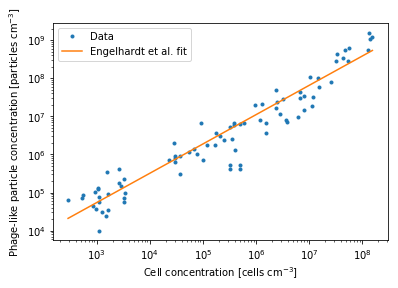

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import gmean
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.insert(0, '../../../statistics_helper')
from CI_helper import *

# Load data extracted from Engelhardt et al.
data = pd.read_excel('marine_deep_subsurface_phage_data.xlsx',skiprows=1)

# Plot the data
plt.loglog(data['Cells concentration [cells cm^-3]'],data['Phage concentration [virions cm^-3]'],'.',label='Data')

# Plot the fit Engelhardt et al. used for the data
fit_xdata = 10**np.linspace(np.log10(data['Cells concentration [cells cm^-3]'].min()),np.log10(data['Cells concentration [cells cm^-3]'].max()),100)
plt.loglog(fit_xdata,271.8*fit_xdata**0.768,label='Engelhardt et al. fit')
plt.xlabel(r'Cell concentration [cells cm$^{-3}$]')
plt.ylabel(r'Phage-like particle concentration [particles cm$^{-3}$]')
plt.legend()

We calculate the geometic mean of the ratios between phage-like particles and prokaryotes across measurements in Engelhardt et al.:

In [2]:
geo_mean_ratio = gmean(data['Phage concentration [virions cm^-3]']/data['Cells concentration [cells cm^-3]'])
print('Our best estimate for the ratio between the concentration of phage-like particles and cells in subseafloor sediments is ≈%.0f.' %geo_mean_ratio)

Our best estimate for the ratio between the concentration of phage-like particles and cells in subseafloor sediments is ≈13.


To calculate the total number of phages in subseafloor sediments, we multiply the ratio of phage-like particles to prokaryotes by our estimate for the total number of prokaryotes in subseafloor sediments.

In [3]:
prokaryote_estimate = pd.read_excel('../../../bacteria_archaea/marine_deep_subsurface/marine_deep_subsurface_prok_biomass_estimate.xlsx')
best_estimate = prokaryote_estimate.loc[0]['Value']*geo_mean_ratio
print('Our best estimate for the total number of phages in subseafloor sediments is ≈%.0e' %best_estimate)

old_results = pd.read_excel('../phage_num_estimate.xlsx')
result = old_results.copy()
result.loc[1] = pd.Series({
                'Parameter': 'Total number of phages in the marine deep subsurface',
                'Value': best_estimate,
                'Units': 'Number of individuals',
                'Uncertainty': np.nan
                })

result.to_excel('../phage_num_estimate.xlsx',index=False)


Our best estimate for the total number of phages in subseafloor sediments is ≈5e+30
